In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import statistics
import scipy.stats
from scipy import stats

The given dataset on which statistical analysis is being performed is a dataset of student performance on exams. it contains gender,race, parents educations level,luch,test preparation course, math score,reading score,writing score

In [2]:
student_perf = '/content/students_perf.csv'
df = pd.read_csv(student_perf)
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [3]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


The mean score of math score is 66.089, reading score is 69.169, writing score is 68.054

In [4]:
df.skew()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


math score      -0.278935
reading score   -0.259105
writing score   -0.289444
dtype: float64

Skewness characterizes the degree of asymmetry of a distribution around its mean

Positive skewness indicates a distribution with an asymmetric tail extending toward more positive values

Negative skewness indicates a distribution with an asymmetric tail extending toward more negative values

The skewness of key, danceability, tempo, duration are closer to zero indicating that these attributes have similar values in all songs in the datasets

In [14]:
null_hypo=df['math score'].mean()
print(null_hypo)

66.089


here mean  of math score column is calculated

In [6]:
df['math score'].median()

66.0

The median is 66

In [7]:
df['math score'].mode()

0    65
dtype: int64

The mode is 65

In [8]:
statistics.variance(df['math score'])

229.918997997998

The variance is a measure of variability

It is calculated by taking the average of squared deviations from the mean. Variance tells you the degree of spread in your data set

The more spread the data, the larger the variance is in relation to the mean

here is there is high variation in data

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


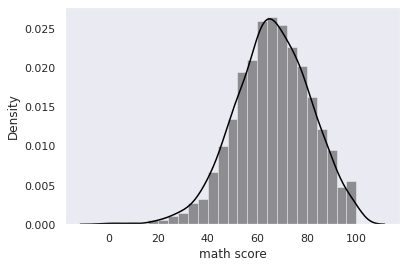

In [9]:
sns.set(style="dark")
sns.distplot(df['math score'], kde=True, color="black")

In [10]:
df.shape[0]

1000

In [11]:
#z test
from numpy.random import randn
from statsmodels.stats.weightstats import ztest

alpha=0.05

ztest_Score, p_value= ztest(df['math score'],value = null_hypo, alternative='larger')
# the function outputs a p_value and z-score corresponding to that value, we compare the 
# p-value with alpha, if it is greater than alpha then we do not null hypothesis 
# else we reject it.
  
if(p_value <  alpha):
  print("Reject Null Hypothesis")
else:
  print("Fail to Reject NUll Hypothesis thus null hypothesis true")

Fail to Reject NUll Hypothesis thus null hypothesis true


In [12]:
#T test

df2=df.head(20)

t_value,p_value=stats.ttest_1samp(df2['math score'],61.05)#,
two_tailed_p_value=float("{:.6f}".format(p_value))
print('Test statistic is %f'%float("{:.6f}".format(t_value)))

print('p-value for one tailed test is %f'%two_tailed_p_value)

alpha = 0.1

if two_tailed_p_value<=alpha:
  print('Null Hypothesis is rejected')

else:
  print('We do not reject the Null Hypothesis ')

Test statistic is 0.000000
p-value for one tailed test is 1.000000
We do not reject the Null Hypothesis 


In [24]:
df['math score'].var()

print('Null hypothesis states that varaince = ',df['math score'].var())
print('althernate hypothesis states that varaince != ',df['math score'].var())


Null hypothesis states that varaince =  229.91899799799796
althernate hypothesis states that varaince !=  229.91899799799796


In [28]:
import math
alpha=0.05/2
dof=df2.shape[0]-1

rejectionRegion=scipy.stats.chi2.ppf(1-alpha,dof)
print(rejectionRegion)

n=df.shape[0]
variance=df['math score'].var()
standDev=math.sqrt(df2['math score'].var())
chisquareval=(float)((n-1)*standDev*standDev)

chisquareval=chisquareval/variance
chisquareval


32.85232686172969


1611.5293489628077

In [29]:
if chisquareval <=rejectionRegion:
  print("cannot reject null hypotheses")
else:
  print('Reject null hypothesis')


Reject null hypothesis
